In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_theme()
import missingno as msno

In [2]:
df = pd.read_excel('Data_shipping.xlsx')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  ROT_Y                10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset description

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
ROT_Y,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


Check dataset for duplicate values

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

In [7]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64

<AxesSubplot:>

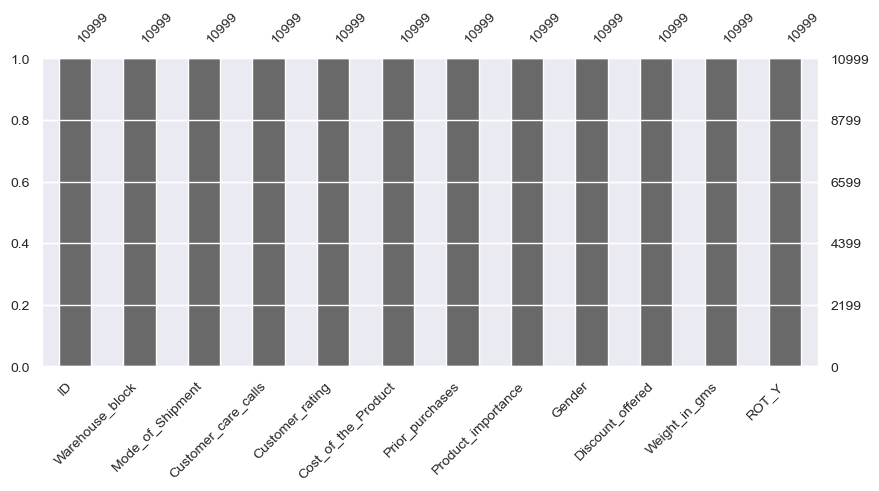

In [8]:
msno.bar(df, figsize=(10, 4), fontsize=10)

### Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

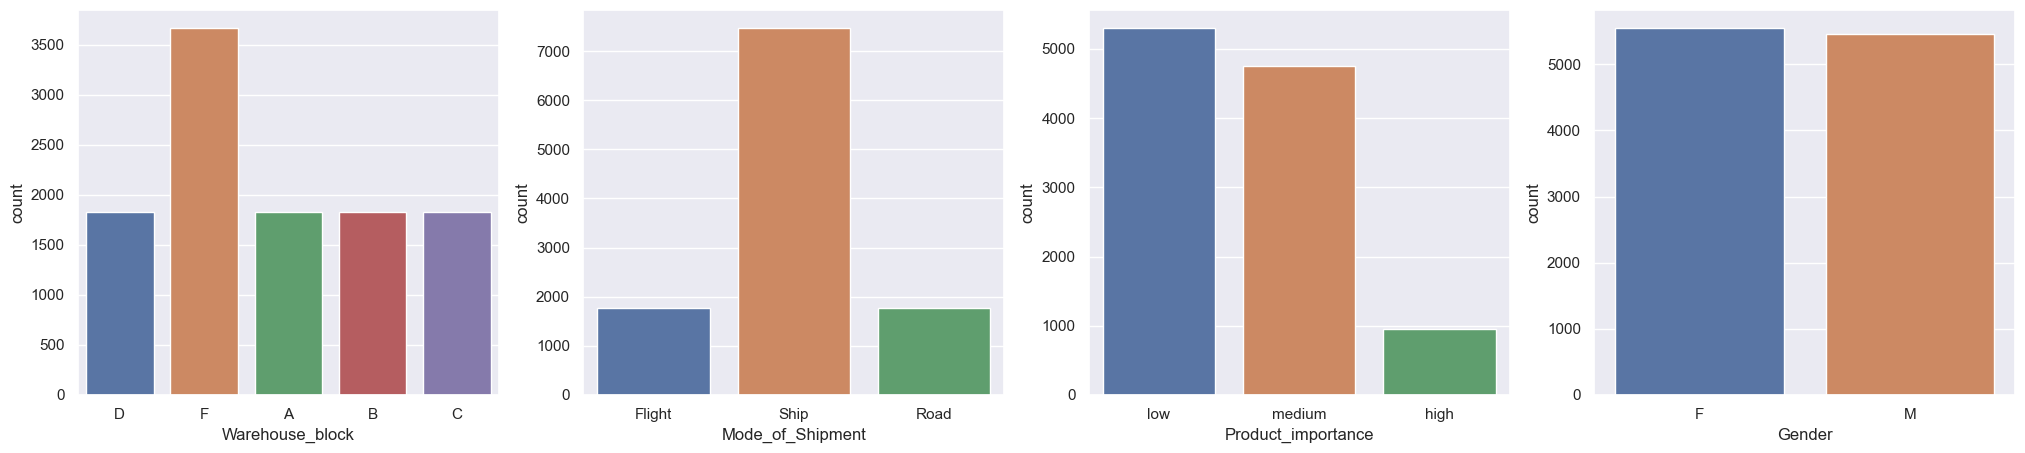

In [9]:
figure, axis = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

sns.countplot(data=df, x="Warehouse_block", ax=axis[0])
sns.countplot(data=df, x="Mode_of_Shipment", ax=axis[1])
sns.countplot(data=df, x="Product_importance", ax=axis[2])
sns.countplot(data=df, x="Gender", ax=axis[3])



Inference - 
- Warehouse F has the most shipments.
- Most deliveries are done by Ship.
- Most products are of low importance.
- The gender does not gives much of informations for the purchased products

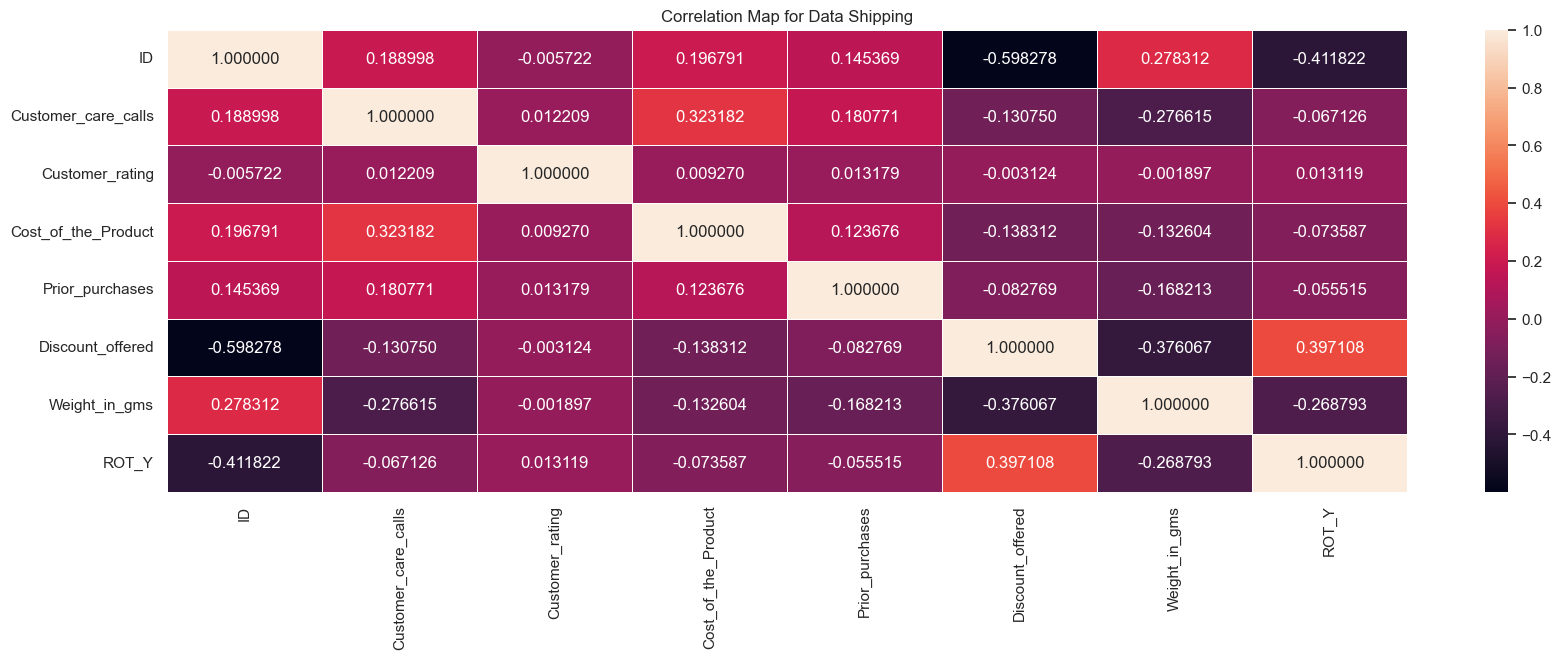

In [10]:
f,ax = plt.subplots(figsize = (20,6))
sns.heatmap(df.corr(), annot=True, fmt="f", linewidths=.5, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map for Data Shipping')
# plt.savefig('graph.png')
plt.show()

<AxesSubplot:xlabel='Customer_care_calls', ylabel='ROT_Y'>

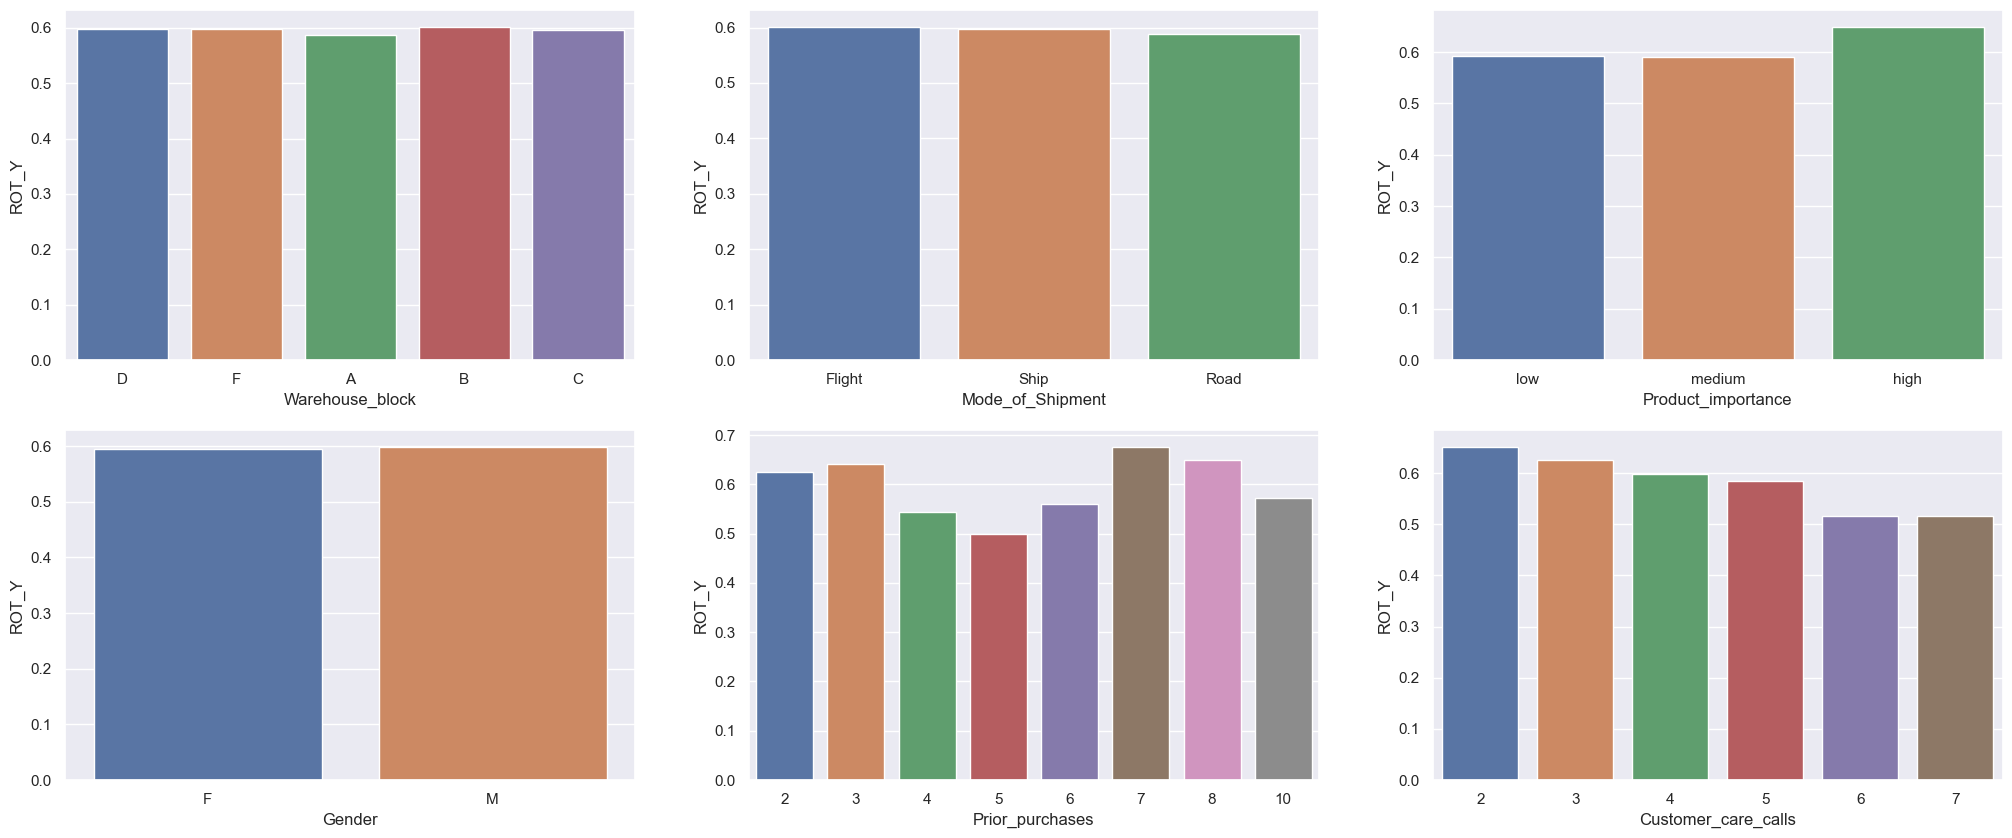

In [11]:
figure, (axis1, axis2) = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

sns.barplot(data=df, x="Warehouse_block", y='ROT_Y', ci=None, ax=axis1[0])
sns.barplot(data=df, x="Mode_of_Shipment", y='ROT_Y', ci=None, ax=axis1[1])
sns.barplot(data=df, x="Product_importance", y='ROT_Y', ci=None,  ax=axis1[2])

sns.barplot(data=df, x="Gender", y='ROT_Y', ci=None, ax=axis2[0])
sns.barplot(data=df, x="Prior_purchases", y='ROT_Y', ci=None, ax=axis2[1])
sns.barplot(data=df, x="Customer_care_calls", y='ROT_Y', ci=None, ax=axis2[2])

Distribution of features

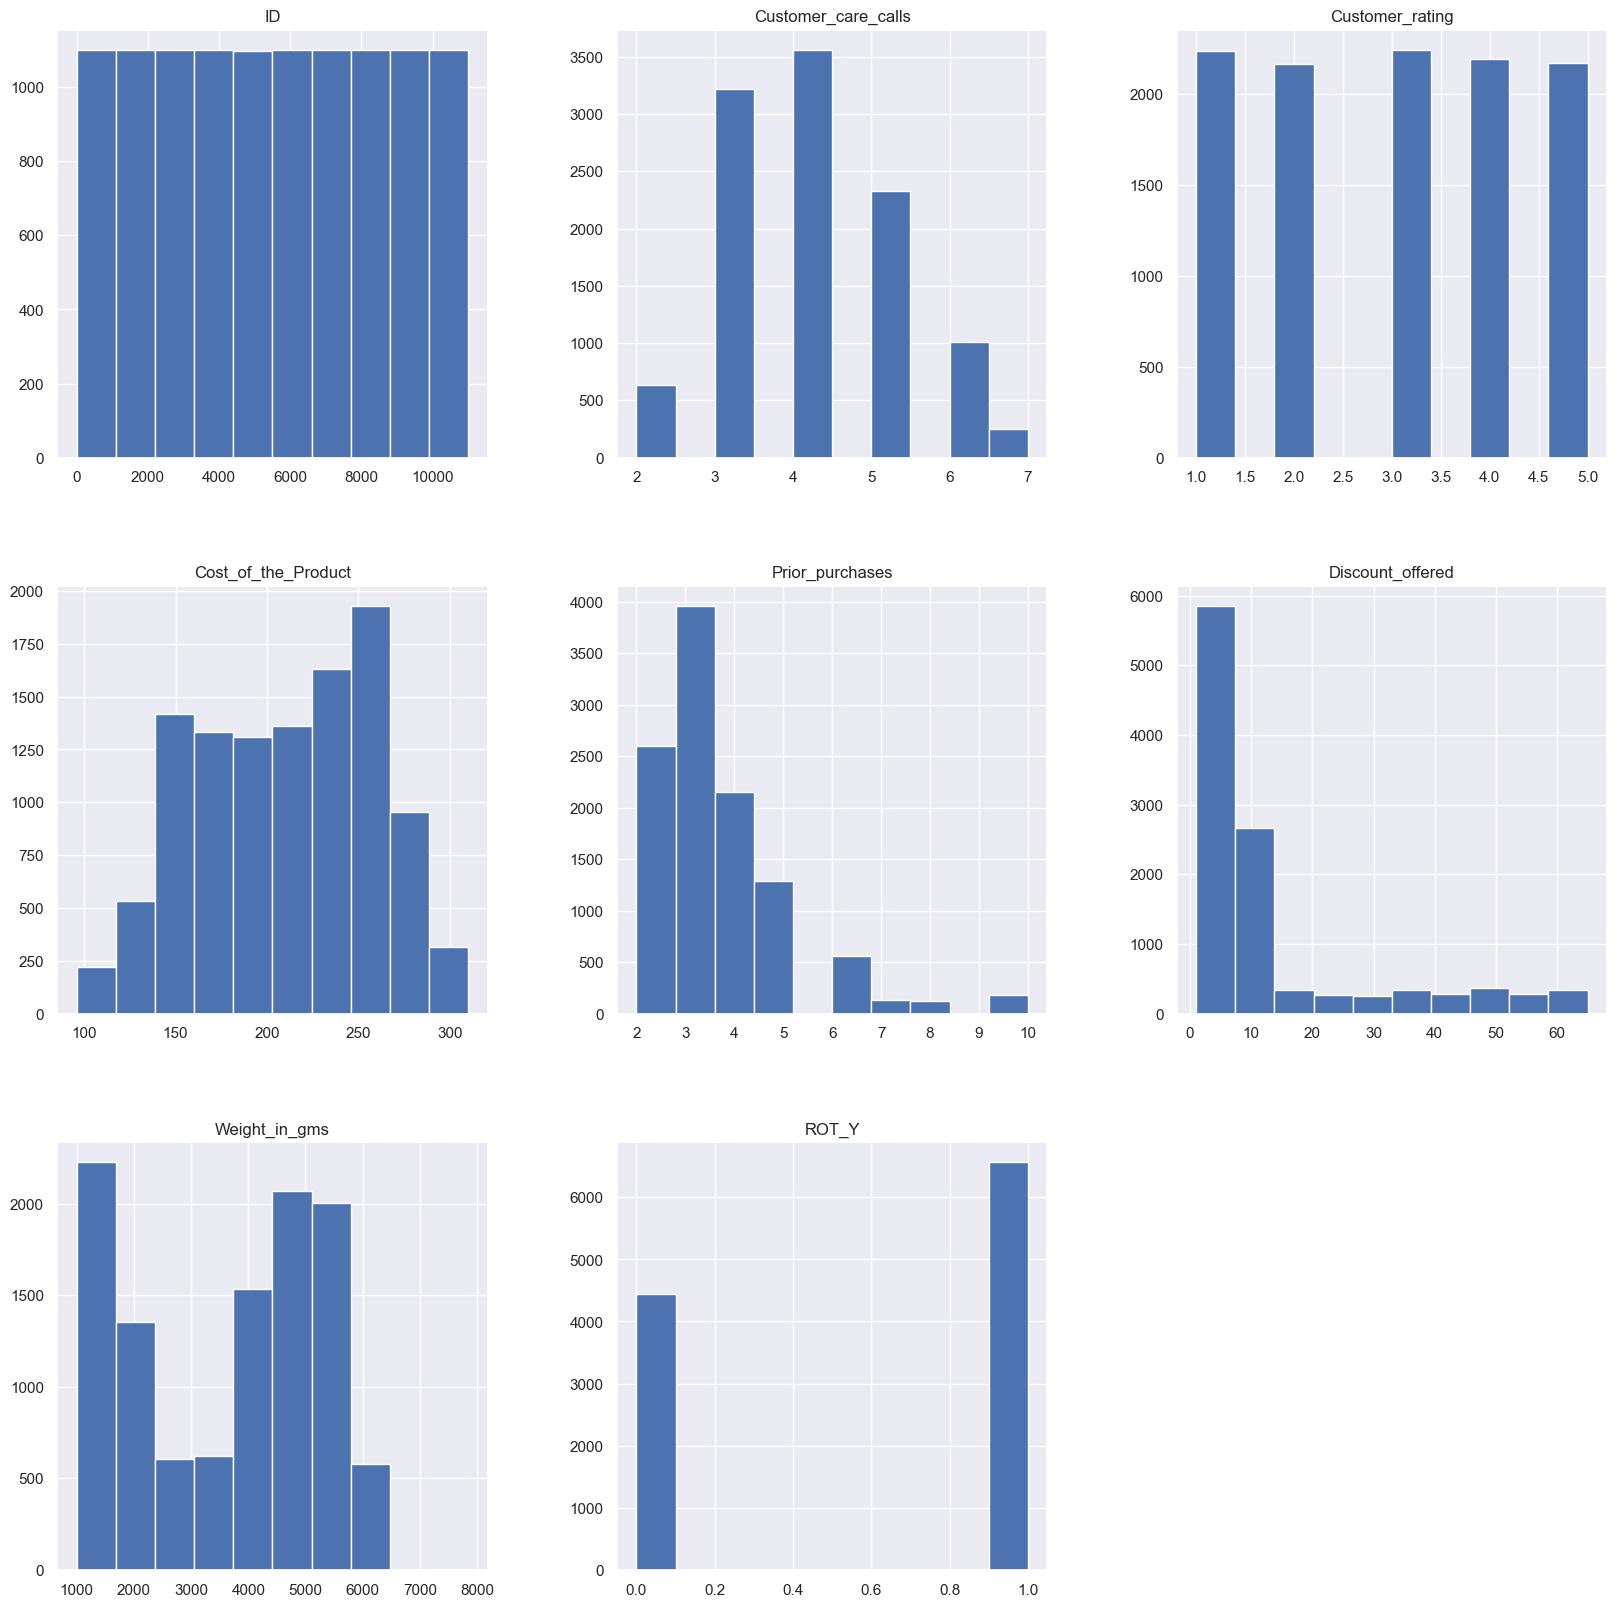

In [12]:
histPlot = df.hist(figsize = (20,20))

Inferences - 
- Normally distributed daya includes cost of the product and no of calls made by the customer
- Customer rating and Weight in grams are neither falls under left skewed nor right skewed distribution 
- Left-Skewed distibution includes the labeled data ROT_Y
- Right-Skewed distribution includes the input data Prior purchases and Discount offered

Check the balance of the dataset label

<AxesSubplot:xlabel='ROT_Y', ylabel='count'>

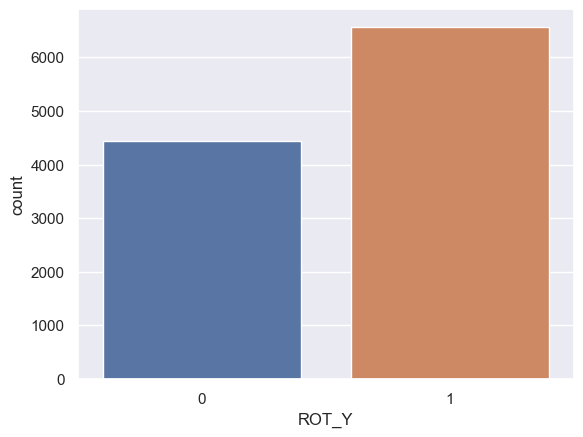

In [13]:
sns.countplot(data=df, x="ROT_Y")

Inference from above plot of target variable
- Chances of order not reaching on time is high from the given label

### Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# convert categorical features to numerical
df = pd.get_dummies(df, columns=["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"])

In [16]:
X = df.drop(['ID', 'ROT_Y'], axis=1)
y = df['ROT_Y']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)
target = ['class 0', 'class 1']

<h4> Machine Learning Training Models </h4>

#### Logistic Regression

              precision    recall  f1-score   support

     class 0       0.55      0.59      0.57       908
     class 1       0.70      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.63      0.64      2200



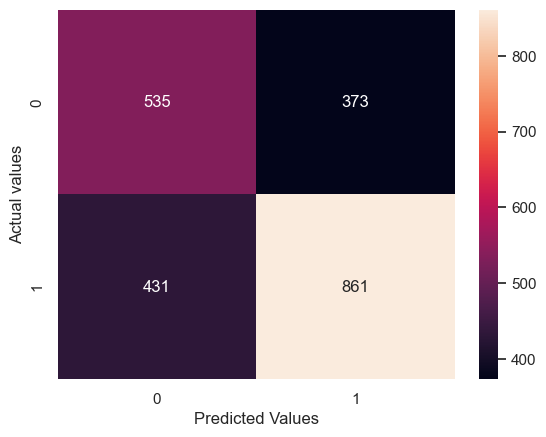

In [18]:
model_lr = LogisticRegression(max_iter=1000, random_state=0)
model_lr.fit(X_train, y_train)
lr_y_pred = model_lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
print(classification_report(y_test, lr_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()


#### Decision Tree

              precision    recall  f1-score   support

     class 0       0.57      0.57      0.57       908
     class 1       0.70      0.69      0.70      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



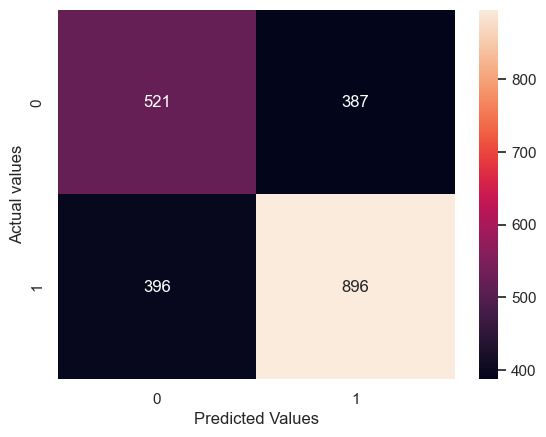

In [19]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)
conf_matrix = confusion_matrix(y_test, dtc_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
print(classification_report(y_test, dtc_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()


#### Support Vector Machine

              precision    recall  f1-score   support

     class 0       0.58      0.62      0.60       908
     class 1       0.72      0.69      0.70      1292

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



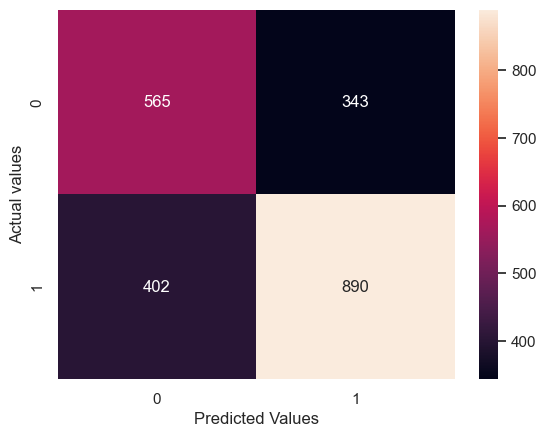

In [20]:
svm = SVC()
svm.fit(X_train,y_train)
svm_y_pred = svm.predict(X_test)
conf_matrix = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
print(classification_report(y_test, svm_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

#### Random Forest Classifier


              precision    recall  f1-score   support

     class 0       0.57      0.88      0.70       908
     class 1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200



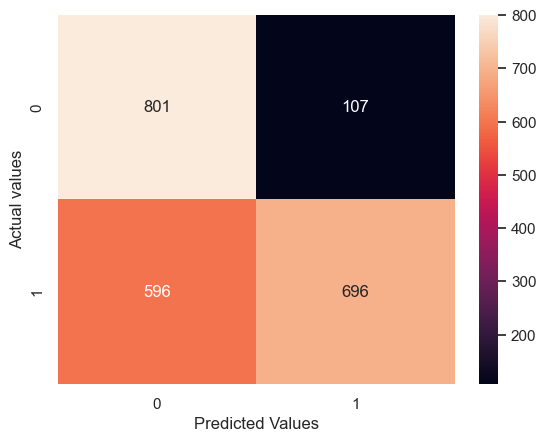

In [21]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc_model.fit(X_train,y_train)
rfc_y_pred = rfc_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, rfc_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
print(classification_report(y_test, rfc_y_pred, target_names=target))
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

#### Naive Bays

              precision    recall  f1-score   support

     class 0       0.54      0.96      0.69       908
     class 1       0.94      0.42      0.58      1292

    accuracy                           0.64      2200
   macro avg       0.74      0.69      0.64      2200
weighted avg       0.77      0.64      0.63      2200



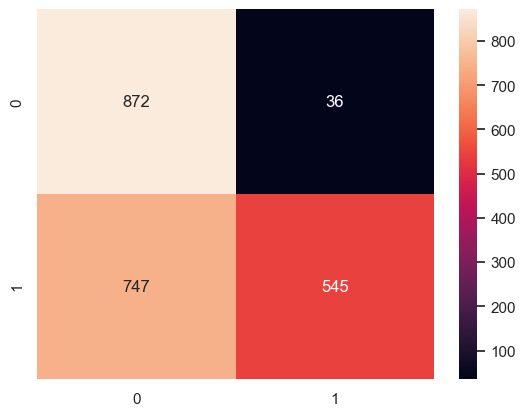

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_y_pred = nb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, nb_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
print(classification_report(y_test, nb_y_pred, target_names=target))

#### K Nearest Neighbor 

c:\Users\PINKY RAMNATH MEHTA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


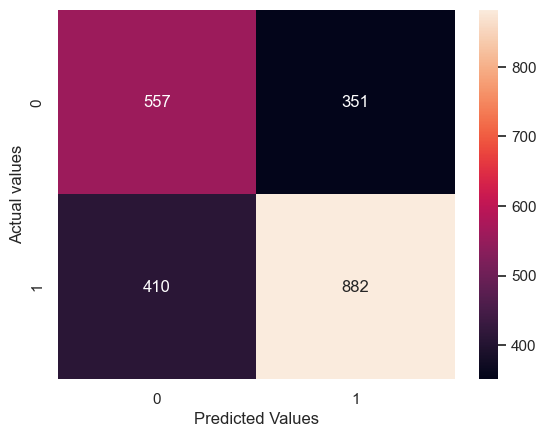

              precision    recall  f1-score   support

     class 0       0.58      0.61      0.59       908
     class 1       0.72      0.68      0.70      1292

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knn_y_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=",d")
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()
print(classification_report(y_test, knn_y_pred, target_names=target))

In [26]:
ml_models = [model_lr, dtc, svm, rfc_model, nb_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest Classifier', 'Naive Bayes', 'KNearest Neighbor']
precision = []
recall = []
f_score = []

y_predictions = []

for model in ml_models:
    y_pred = model.predict(X_test)
    y_predictions.append(y_pred)

for y_pred in y_predictions:
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)

    precision.append(p)
    recall.append(r)
    f_score.append(f)

results = pd.DataFrame(
    {"Models": model_names, "precision": precision, "recall": recall, "f1_score":f_score}
)
results


c:\Users\PINKY RAMNATH MEHTA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Models,precision,recall,f1_score
0,Logistic Regression,0.697731,0.666409,0.681710
1,Decision Tree,0.698363,0.693498,0.695922
2,Support Vector Machine,0.721817,0.688854,0.704950
3,Random Forest Classifier,0.866750,0.538700,0.664439
4,Naive Bayes,0.938038,0.421827,0.581954
5,KNearest Neighbor,0.715328,0.682663,0.698614


<AxesSubplot:xlabel='Models'>

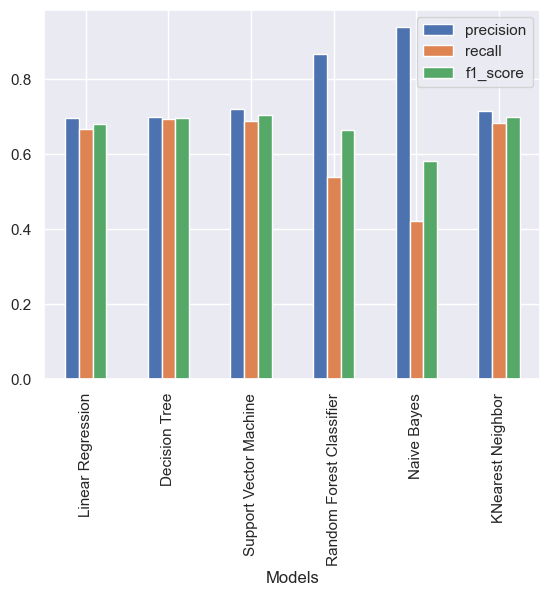

In [25]:
results.plot.bar(x="Models")